# Giacomo Comitani 986596

In [ ]:
# Plotto il grafico del binomiale

specificazioni:  [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32]
numero di occorrenze per specificazione:  [   1   11   47  188  445  916 1359 1574 1676 1452 1040  671  388  142
   71   13    6]


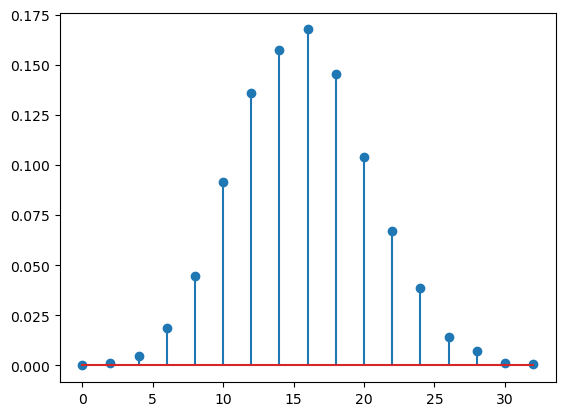

In [12]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as st

p = 0.3 # probabilità scelta arbitrariamente
n = 26
num_sample = 10000 # maggiore è il numero di sample, maggiore è accurata la previsione della distribuzione nella generazione del grafico empirico
binom = st.binom(n,p)
X = binom.rvs(num_sample) # rvs --> random variates of given type (in questo caso una Bernoulliana)

Z = 2*X

unique_values, counts = np.unique(Z, return_counts = True) 
# unique_values --> specificazioni "reali" con i valori assegnati alle variabili 'a' e 'b'
# counts --> numero di occorrenze per ciascuna specificazione della distribuzione Z
print("specificazioni: ",unique_values) # {b, a+b}
print("numero di occorrenze per specificazione: ", counts)

# Grafico generato a partire da una pmf calcolata "a mano" (grafico empirico):
pmf = counts / num_sample # pmf --> funzione di massa di probabilità
plt.stem(unique_values, pmf) # crea il primo grafico, quello con la linea rossa orizzontale
plt.show()


Le specificazioni di Z sono tutti i numeri pari compresi nell'intervallo {0, ..., 2n}

Ora calcolo P(Z = 0) e P(Z = 2n)

Nel primo caso ho quindi P(2X = 0) = P(X = 0)

Nel secondo ho P(2X = 2n) = P(X = n).

sostituiendo i rispettivi valori nella formula della funzione di massa del modello binomiale mi escono rispettivamente: 

- (1-p)^n

- p^n

Ora mi chiede: studiate la relazione che c'è tra `X` e `Z` e scrivete la formula analitica della funzione di massa di probabilità di `Z`.

Qui ricordo che Z = 2X. posso quindi sostituire nell formula:

P(Z = k) = P(2X = k) = P(X = k/2). da qui posso risolvere e scrivere la formulina

Punto dopo: assumo n = 3 e p = 1/2, vuole che plotto il grafico di Z giustificando la scelta di quale uso

specificazioni:  [0 2 4 6]
numero di occorrenze per specificazione:  [1225 3691 3825 1259]


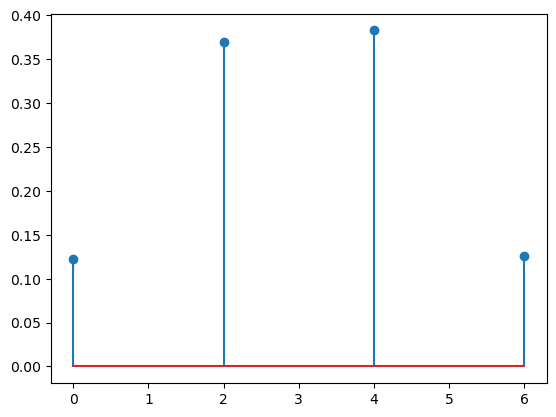

In [15]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as st

p = 0.5 # probabilità scelta arbitrariamente
n = 3
num_sample = 10000 # maggiore è il numero di sample, maggiore è accurata la previsione della distribuzione nella generazione del grafico empirico
binom = st.binom(n,p)
X = binom.rvs(num_sample) # rvs --> random variates of given type (in questo caso una Bernoulliana)

Z = 2*X

unique_values, counts = np.unique(Z, return_counts = True) 
# unique_values --> specificazioni "reali" con i valori assegnati alle variabili 'a' e 'b'
# counts --> numero di occorrenze per ciascuna specificazione della distribuzione Z
print("specificazioni: ",unique_values) # {b, a+b}
print("numero di occorrenze per specificazione: ", counts)

# Grafico generato a partire da una pmf calcolata "a mano" (grafico empirico):
pmf = counts / num_sample # pmf --> funzione di massa di probabilità
plt.stem(unique_values, pmf) # crea il primo grafico, quello con la linea rossa orizzontale
plt.show()

Calcolate valore atteso e varianza

Devo ragionare su proprietà di linearità del valore atteso e della varianza

Valore atteso: normalmente = n*p

Varianza: normalmente = n*p(1-p)

Valore atteso Z : 2np

Varianza di Z: 4(np(1-p))

# Esercizio 2

Da qui al posto di n devo usare m

Introduciamo `m` per indicare un sottoinsieme del campione. n è già utiolizzato come prametro del modello binomiale.

Ora mi chiede se Z è uno stimatore non deviato. Ricordo uno stimatore è non deviato se la sua media è uguale al parametro che vuole stimare.

Varianza = 4(np(1-p))

Quindi mi basta dire che il valore atteso di z segnato deve essere uguale alla varianza.

faccio formula, semplifico e ottengo che l'uguaglianza non vale, ottenendo ceh Z NON è uno stimatore NON deviato per Z. 

A questo punto mi chiede di trovare uno stimatore NON distorto per il parametro p

Quidni mi sta chiedendo di trovare un qualcusa i cui valore atteso è p.

A questo punto mi viene in mente di usare Z che ha valore atteso = 2np, e dividerla per 2n per ottenere p

Quindi T = Z/2n e funziona

Ora mi chiede la varianza di T. So che la varianza di Z è 4np. e so come si comporta la scalatura della varianza. quindi so che la varianza di T = (1/2n)^2*aVar(Z) = 1/4n^2 * 4(np(1-p)).

per calcolare la eìdeviazione metto tutto sotto radice e ho fatto.

#Esercizio 3

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

ztl = pd.read_csv('./ztl.csv', delimiter=';',
decimal='.')

# Ora vuole i valori mancanti per ogni possibile valore dell'attributo categoria

valMancanti = {col : len(ztl[col]) - len(ztl[col].dropna()) for col
in ztl.columns}

dataF = pd.DataFrame(index = valMancanti.keys(), data = valMancanti.values(),
columns = ['mancanti'])

dataF

,mancanti
id-autoveicolo,0
categoria,7
abbonamento,0
passaggi,0
altamente-inquinante,0
